## 下載特定的美股歷史股價，並存成檔案

In [1]:
import os
import sys

In [2]:
# 把我們自己寫的模組的位置，加入到模組搜尋路徑之中，不然會有 import error
module_dir = os.path.join(os.path.dirname(os.getcwd()), 'modules')
if not module_dir in sys.path:
    sys.path.append(module_dir)

In [3]:
import pandas as pd
from datetime import datetime
from crawler import get_quotes

## 抓取資料

In [4]:
portfolio = ['AAPL', 'GOOG', 'AMZN', 'MSFT']

In [5]:
start = datetime(2017, 1, 1)
end = datetime(2017, 12, 31)

In [6]:
data = {}

for symbol in portfolio:
    try:
        data[symbol] = get_quotes(symbol, start, end)
    except Exception as e:
        print("Error accesing symbol:", symbol, "==>", e.args)

In [7]:
# 看看有幾筆資料
len(data.keys())

4

## 將股票序列化並存成檔案

In [8]:
filename = '../data/stockdata' 

In [9]:
import pickle

with open(filename, 'wb') as f:
    pickle.dump(data, file=f)

## 將股票資料讀回來使用看看

In [10]:
with open(filename, 'rb') as f:
    stocks = pickle.load(file=f)

In [11]:
stocks.keys()

dict_keys(['2330.tw', '2317.tw', '2412.tw', '2454.tw'])

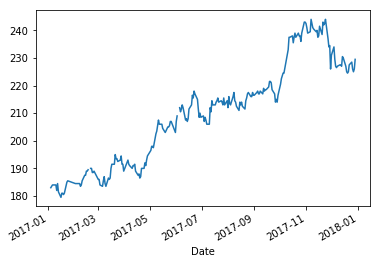

In [13]:
%matplotlib inline
symbol = list(stocks.keys())[0]
stocks[symbol]['Close'].plot()